# INTRODUCTION

# Problem Statement

# Objectives

# Data loading

First, we import the necessary python libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we load the dataset using pandas, and look at the first 5 rows.

In [2]:
data = pd.read_csv('./data/kc_house_data.csv')
data.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Description of columns

In [3]:
data.shape

(21597, 21)

The dataset contains 21 columns and 21,597 rows.

Now to go into more detail on the columns we have. We will use the `column_names.md` file to get more information about our columns.

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house. An index from 0 to 4 of how good the view of the property was.
* `condition` - How good the overall condition of the house is. Related to maintenance of house. An index from 1 to 5 on the condition of the house.
* `grade` - Overall grade of the house. Related to the construction and design of the house, where 1-3 is poor, 4-6 is low average, 7 is average, 8-9 is good, and 10-13 is excellent.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

# Initial Data Exploration

In [5]:
# Looking at a summary of column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Observations

* `id` - integer ( Should be a string)

* `date` - object (Should be datetime)

* `bathrooms` - float64 (Should be integer, as there are no half bathrooms)

* `floors` - float64 (Should be integer)

* `condition` - object (Should be integer, An index from 1 to 5 on the condition of the house.)

* `grade`: object (Should be split into the grade number, an integer, and the grade comment, which is a string)

* `sqft_basement`: object (Should be converted to a float)

In [6]:
# Convert the 'id' column to a string
data['id'] = data['id'].astype(str)

# Converting 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Converting 'bathrooms' column from float to the nearest integer
data['bathrooms'] = data['bathrooms'].round().astype(int)

# Converting the 'floors' column from float to the nearest integer
data['floors'] = data['floors'].round().astype(int)

In [7]:
# Checking the unique values in 'condition' column
data['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [8]:
# Define a mapping for the condition values to integers
condition_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

# Apply the mapping to the 'condition' column
data['condition'] = data['condition'].map(condition_mapping)

# Confirm the conversion
data['condition'].head()


0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int64

In [9]:
# Check the unique values in the 'grade' column
data['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [10]:
# Define a mapping for the grade values to integers
grade_mapping = {
    '3 Poor': 1,
    '4 Low': 2,
    '5 Fair': 3,
    '6 Low Average': 4,
    '7 Average': 5,
    '8 Good': 6,
    '9 Better': 7,
    '10 Very Good': 8,
    '11 Excellent': 9,
    '12 Luxury': 10,
    '13 Mansion': 11
}

# Apply the mapping to the 'grade' column
data['grade_numeric'] = data['grade'].map(grade_mapping)

# Create a new column to describe the resulting condition
grade_description = {
    1: 'Poor',
    2: 'Low',
    3: 'Fair',
    4: 'Low Average',
    5: 'Average',
    6: 'Good',
    7: 'Better',
    8: 'Very Good',
    9: 'Excellent',
    10: 'Luxury',
    11: 'Mansion'
}

data['grade_description'] = data['grade_numeric'].map(grade_description)

# Confirm the new columns
data[['grade', 'grade_numeric', 'grade_description']].head()


,grade,grade_numeric,grade_description
0,7 Average,5,Average
1,7 Average,5,Average
2,6 Low Average,4,Low Average
3,7 Average,5,Average
4,8 Good,6,Good


In [11]:
# Replace non-numeric values with NaN and convert the column to numeric
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', pd.NA), errors='coerce')

# Confirm the conversion
data['sqft_basement'].dtype


dtype('float64')

In [12]:
# Checking the unique values in 'waterfront'
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [13]:
# Convert 'waterfront' values to 1 and 0
waterfront_mapping = {
    'YES': 1,
    'NO': 0
}

data['waterfront'] = data['waterfront'].map(waterfront_mapping)

# Confirm the conversion
data['waterfront'].head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [14]:
# Looking for null values
data.isna().sum()

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2376
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement         454
yr_built                0
yr_renovated         3842
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
grade_numeric           0
grade_description       0
dtype: int64

In [15]:
# Checking the percentage of the missing values
(data.isna().sum()/data.shape[0])*100

id                    0.000000
date                  0.000000
price                 0.000000
bedrooms              0.000000
bathrooms             0.000000
sqft_living           0.000000
sqft_lot              0.000000
floors                0.000000
waterfront           11.001528
view                  0.291707
condition             0.000000
grade                 0.000000
sqft_above            0.000000
sqft_basement         2.102144
yr_built              0.000000
yr_renovated         17.789508
zipcode               0.000000
lat                   0.000000
long                  0.000000
sqft_living15         0.000000
sqft_lot15            0.000000
grade_numeric         0.000000
grade_description     0.000000
dtype: float64

Missing Values Observations:
* `waterfront` has some missing values (11% of the data)

* `view` has a few missing values (0.29% of the data)

* `sqft_basement` has a few nissing values (2.1% of the data)

* `yr_renovated` has many missing values (17.79% of the data).


Srategies for dealing with the missing values:

1. `waterfront` (11%):

    Drop the missing values because they constitute a small percentage of the data.

2. `yr_renovated` (17.79%):
    
    We can fill the missing values with 0. 
    
    A value of 0 might indicate that the house was never renovated.

3. `sqft_basement` (2.1%)

    We can also drop these

In [16]:
# Drop missing values in 'view', 'waterfront', and 'sqft_basement'
data = data.dropna(subset=['view', 'waterfront', 'sqft_basement'])


In [17]:
# Impute missing values for 'yr_renovated' with 0
data['yr_renovated'] = data['yr_renovated'].fillna(0)

Now lets also map `views` to numeric values.

In [18]:
# Define a mapping for the view values to a numeric scale
view_mapping = {
    'NONE': 0,
    'FAIR': 1,
    'AVERAGE': 2,
    'GOOD': 3,
    'EXCELLENT': 4
}

# Apply the mapping to the 'view' column
data['view'] = data['view'].map(view_mapping)

# Confirm the conversion
data['view'].head()


1    0
2    0
3    0
4    0
5    0
Name: view, dtype: int64

Now we can check for duplicate entries in our data

In [19]:
data.duplicated().sum()

0

We have none. 

Next we can calculate the cardinality of each column

In [20]:
data.nunique()

id                   18619
date                   369
price                 3345
bedrooms                12
bathrooms                9
sqft_living            982
sqft_lot              8919
floors                   4
waterfront               2
view                     5
condition                5
grade                   11
sqft_above             896
sqft_basement          297
yr_built               116
yr_renovated            69
zipcode                 70
lat                   4920
long                   738
sqft_living15          744
sqft_lot15            7959
grade_numeric           11
grade_description       11
dtype: int64

We can tell that we have some entries that have the same ids. let's extract those entries and have a closer look to check if they are duplicates

In [21]:
# Find entries with the same id
duplicate_ids = data[data.duplicated(subset=['id'], keep=False)]

# Count the number of such entries
duplicate_ids_count = duplicate_ids.shape[0]

duplicate_ids, duplicate_ids_count


(               id       date      price  bedrooms  bathrooms  sqft_living  \
 93     6021501535 2014-07-25   430000.0         3          2         1580   
 94     6021501535 2014-12-23   700000.0         3          2         1580   
 313    4139480200 2014-06-18  1380000.0         4          3         4290   
 314    4139480200 2014-12-09  1400000.0         4          3         4290   
 345    3969300030 2014-07-23   165000.0         4          1         1000   
 ...           ...        ...        ...       ...        ...          ...   
 20165  7853400250 2015-02-19   645000.0         4          4         2910   
 20763  6300000226 2014-06-26   240000.0         4          1         1200   
 20764  6300000226 2015-05-04   380000.0         4          1         1200   
 21564  7853420110 2014-10-03   594866.0         3          3         2780   
 21565  7853420110 2015-05-04   625000.0         3          3         2780   
 
        sqft_lot  floors  waterfront  view  ...  sqft_basement

We can see that they are the same houses, with different selling dates. We can assume that these are houses that have been sold more than once at different times.

So lets sort the date in ascending order and delete the first sale entry and only keep the latest house sale.

In [22]:
# Sort the data by date in ascending order
data = data.sort_values(by='date')

# Drop the first duplicate keeping the last entry
data = data.drop_duplicates(subset=['id'], keep='last')

# Confirm the number of rows remaining after dropping duplicates
data.shape

(18619, 23)

We can see that our resulting data has **18,619 rows** and **23 columns**

In [23]:
# Verify the cleaning steps
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18619 entries, 17386 to 16580
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 18619 non-null  object        
 1   date               18619 non-null  datetime64[ns]
 2   price              18619 non-null  float64       
 3   bedrooms           18619 non-null  int64         
 4   bathrooms          18619 non-null  int64         
 5   sqft_living        18619 non-null  int64         
 6   sqft_lot           18619 non-null  int64         
 7   floors             18619 non-null  int64         
 8   waterfront         18619 non-null  float64       
 9   view               18619 non-null  int64         
 10  condition          18619 non-null  int64         
 11  grade              18619 non-null  object        
 12  sqft_above         18619 non-null  int64         
 13  sqft_basement      18619 non-null  float64       
 14  yr_buil

# Feature Engineering
We have already created the new column `grade_numeric` to help us with our analysis.

We can consider creating the following new features:

1. `age_of_house`: age = 2024 - yr_built
2. `renovation_age`: renovation_age = 2024 - yr_renovated (if renovated, otherwise 0)
3. `total_square_footage`: total_sqft = sqft_living + sqft_basement

In [24]:
# 1. Age of the house
data['age_of_house'] = 2024 - data['yr_built']

# 2. Renovation age
data['renovation_age'] = data.apply(lambda row: 2024 - row['yr_renovated'] if row['yr_renovated'] > 0 else 0, axis=1)

# 3. Total square footage
data['total_square_footage'] = data['sqft_living'] + data['sqft_basement']

# Display the new columns to confirm the changes
data[['age_of_house', 'renovation_age', 'total_square_footage']].head()


,age_of_house,renovation_age,total_square_footage
17386,45,0.0,2910.0
14803,50,0.0,1480.0
12354,29,0.0,3240.0
312,103,0.0,3930.0
17024,23,0.0,3310.0


We can drop the following columns as we will not be using them in our analysis: 

`zipcode`, `lat`, `long`

In [25]:
# Drop the columns 'zipcode', 'lat', and 'long'
data.drop(columns=['zipcode', 'lat', 'long'], inplace=True)

# Confirm the columns have been dropped
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'grade_numeric', 'grade_description',
       'age_of_house', 'renovation_age', 'total_square_footage'],
      dtype='object')

In [26]:
data.to_csv('cleaned_data_for_modeling.csv', index=False)

# Summary Statistics

In [27]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade_numeric,age_of_house,renovation_age,total_square_footage
count,18619,1.861900e+04,18619.000000,18619.00000,18619.000000,1.861900e+04,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000,18619.00000,18619.000000,18619.000000,18619.000000,18619.000000,18619.000000
mean,2014-10-29 17:55:38.976314624,5.428944e+05,3.375154,2.06257,2085.128417,1.511061e+04,1.536226,0.007573,0.231430,3.410978,1794.186852,290.941565,1971.134110,67.545088,1989.35163,12797.225039,5.664858,52.865890,0.939793,2376.069982
min,2014-05-02 00:00:00,7.800000e+04,1.000000,0.00000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,399.00000,651.000000,1.000000,9.000000,0.000000,370.000000
25%,2014-07-22 00:00:00,3.240000e+05,3.000000,2.00000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1200.000000,0.000000,1952.000000,0.000000,1490.00000,5100.000000,5.000000,27.000000,0.000000,1500.000000
50%,2014-10-17 00:00:00,4.513000e+05,3.000000,2.00000,1920.000000,7.621000e+03,2.000000,0.000000,0.000000,3.000000,1564.000000,0.000000,1975.000000,0.000000,1840.00000,7624.000000,5.000000,49.000000,0.000000,2170.000000
75%,2015-02-18 00:00:00,6.450000e+05,4.000000,2.00000,2550.000000,1.072300e+04,2.000000,0.000000,0.000000,4.000000,2220.000000,560.000000,1997.000000,0.000000,2370.00000,10102.500000,6.000000,72.000000,0.000000,2990.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.00000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.00000,871200.000000,11.000000,124.000000,90.000000,17670.000000
std,NaN,3.717837e+05,0.927393,0.75512,922.953948,4.108342e+04,0.554395,0.086695,0.764088,0.650128,833.215262,442.345422,29.345816,360.954273,685.37181,27506.976140,1.175874,29.345816,5.773082,1183.545205


# Initial visualizations

First we can have a look at the distribution of our numerical variables

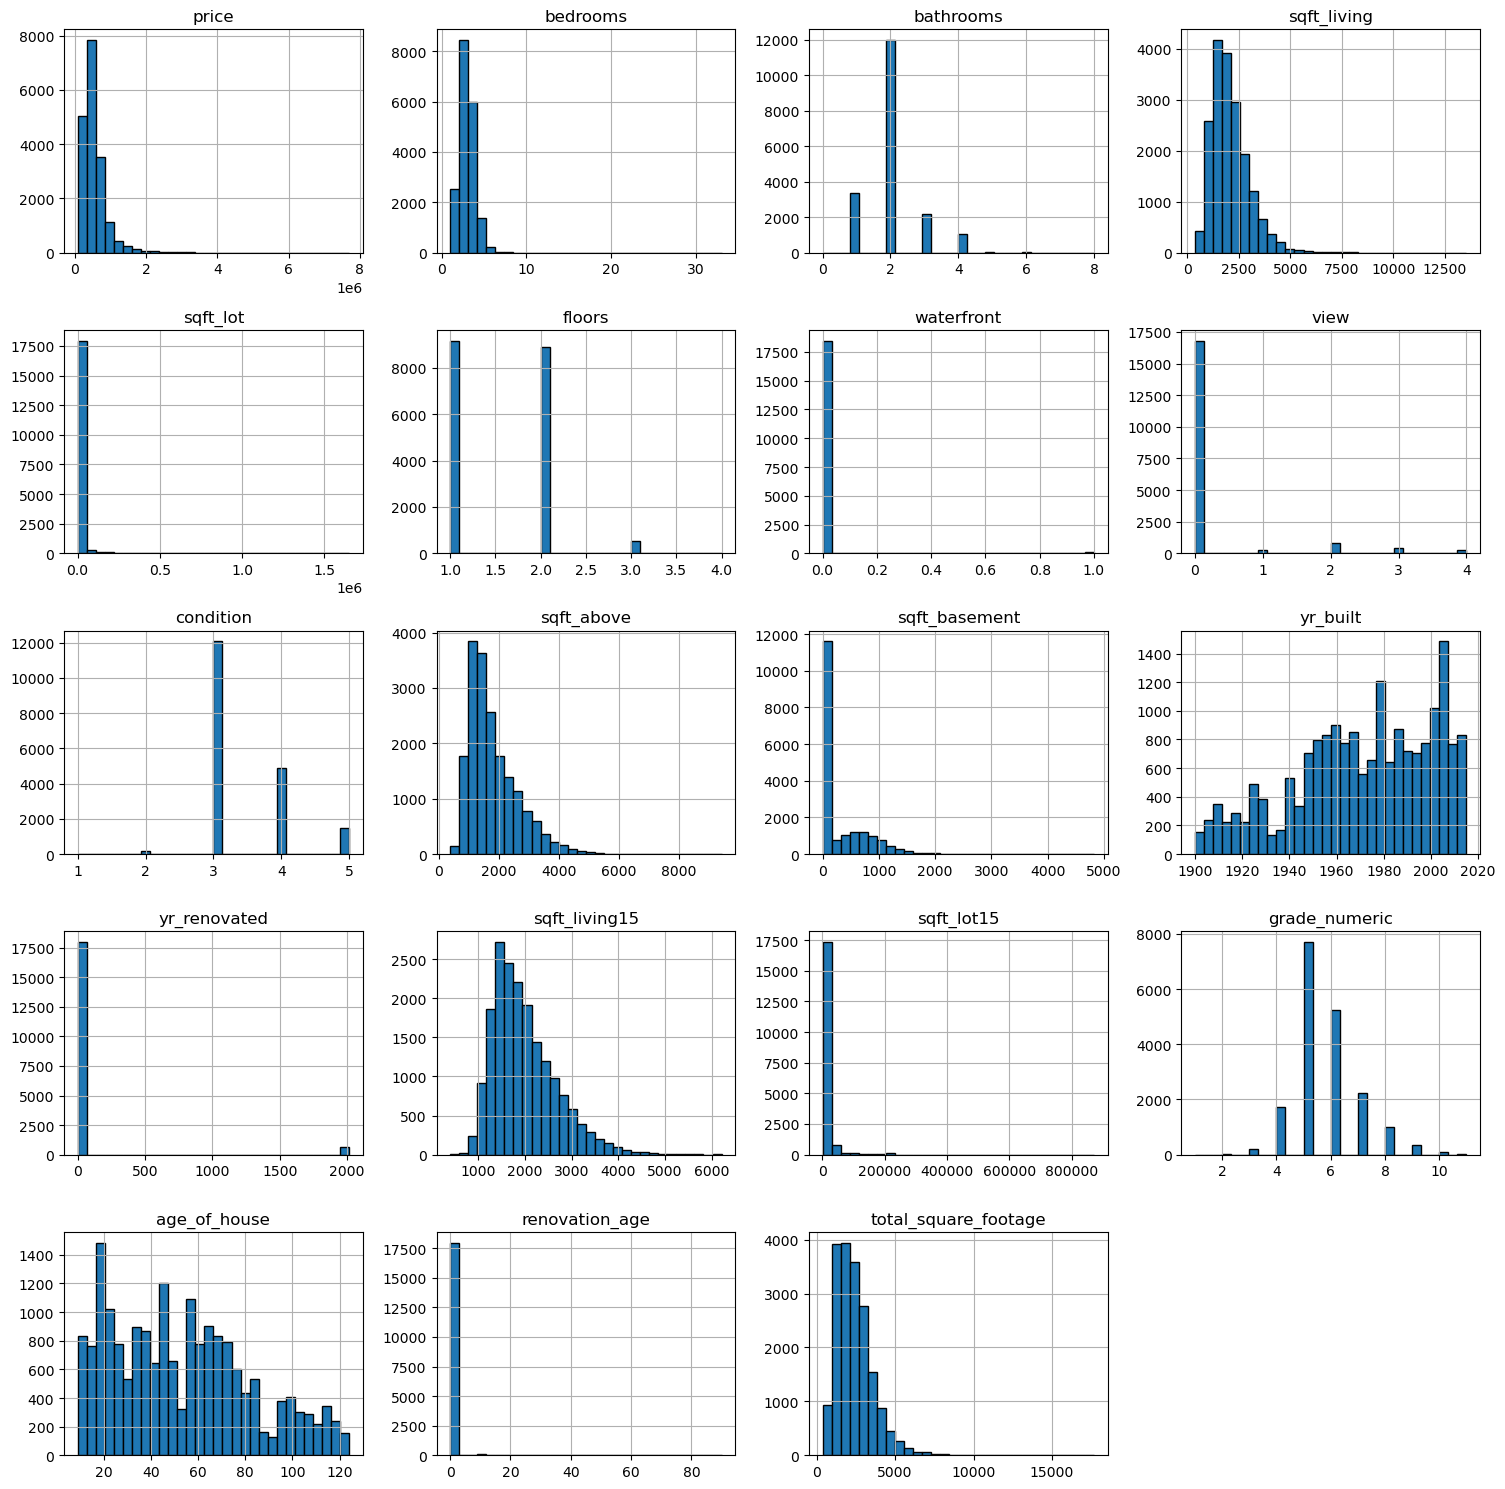

In [28]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
data[numerical_columns].hist(figsize=(15, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


## Observations
1. **Price**:

    * The distribution is right-skewed, indicating that most houses are priced below $1 million, with a few very high-priced properties.

2. **Bedrooms**:

    * Most houses have 3 to 4 bedrooms. There are few houses with more than 6 bedrooms, and very few with exceptionally high bedroom counts.

3. **Bathrooms**:

    * Most houses have between 1 and 3 bathrooms. The distribution shows a right skew with fewer houses having more than 4 bathrooms.

4. **Sqft_Living**:

    *The distribution is right-skewed, with most houses having less than 4000 sqft of living space.

5. **Sqft Lot**:

    * The distribution is heavily right-skewed with most houses having lot sizes less than 15,000 sqft. There are a few outliers with very large lot sizes.

6. **Floors**:

    * Most houses have either 1 or 2 floors, with very few having 3 or more floors.

7. **Waterfront**:

    * The distribution indicates that a very small number of houses are on the waterfront.

8. **View**:

    * The majority of houses have a view rating of 0 (none). Other view ratings (1 to 4) are much less common.

9. **Condition**:

    * Most houses have a condition rating of 3 (Average) or 4 (Good), with fewer houses rated as 1 (Poor) or 5 (Very Good).

10. **Sqft Above**:

    * The distribution is right-skewed, similar to sqft_living, indicating that most houses have less than 3000 sqft above ground.

11. **Sqft Basement**:

    * Most houses either have no basement or have a basement size less than 1500 sqft. The distribution shows a sharp drop-off after that.

12. **Yr Built**:

    * The distribution is relatively uniform with peaks around the 1950s and 2000s, indicating periods of increased construction.

13. **Yr Renovated**:

    * Most houses have a renovation year of 0 (indicating no renovation). For those that have been renovated, the distribution shows peaks in more recent years.

14. **Sqft Living15**:

    * The distribution is right-skewed, with most houses having neighboring houses with less than 4000 sqft of living space.

15. **Sqft Lot15**:


    * The distribution is heavily right-skewed with most houses having neighboring lot sizes less than 20,000 sqft, but some have much larger neighboring lot sizes.

16. **Grade Numeric**:

    * Most houses have a grade between 5 (Average) and 7 (Good). Higher grades are less common.

17. **Age of House**:

    * The distribution indicates that many houses are between 20 to 80 years old, with fewer houses being either very new or very old.

18. **Renovation Age**:

    * Most houses either have a renovation age of 0 or were renovated in the past 20 years. There are fewer houses with renovations older than that.

19. Total Square Footage:

    * The distribution is right-skewed with most houses having a total square footage (living + basement) of less than 4000 sqft.

## Calculating the correlation matrix

In [29]:
# Calculating the correlation matrix
correlation_matrix = data[numerical_columns].corr()

correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade_numeric,age_of_house,renovation_age,total_square_footage
price,1.000000,0.309335,0.518967,0.704290,0.086570,0.245389,0.273221,0.396750,0.035287,0.608606,0.323112,0.051824,0.109877,0.582200,0.081841,0.666666,-0.051824,0.078642,0.669982
bedrooms,0.309335,1.000000,0.489102,0.578069,0.029759,0.184748,-0.001935,0.085687,0.023458,0.480583,0.300899,0.158290,0.016483,0.392332,0.027848,0.360588,-0.158290,-0.002051,0.563250
bathrooms,0.518967,0.489102,1.000000,0.701156,0.089051,0.332852,0.065783,0.201950,-0.070983,0.600797,0.331281,0.377867,0.057247,0.495711,0.087975,0.593080,-0.377867,0.026196,0.670591
sqft_living,0.704290,0.578069,0.701156,1.000000,0.172525,0.326171,0.108944,0.286899,-0.061220,0.878016,0.432643,0.317582,0.043628,0.755234,0.183314,0.763828,-0.317582,0.023911,0.941520
sqft_lot,0.086570,0.029759,0.089051,0.172525,1.000000,-0.005487,0.022566,0.071219,-0.015693,0.183721,0.013912,0.055671,0.001670,0.144290,0.719812,0.114592,-0.055671,0.007156,0.139739
floors,0.245389,0.184748,0.332852,0.326171,-0.005487,1.000000,0.021671,0.025663,-0.225202,0.490339,-0.243062,0.383520,0.005514,0.243400,-0.011119,0.409082,-0.383520,0.000925,0.163512
waterfront,0.273221,-0.001935,0.065783,0.108944,0.022566,0.021671,1.000000,0.405715,0.017203,0.073876,0.088157,-0.026240,0.075804,0.088791,0.031513,0.086543,0.026240,0.088803,0.117905
view,0.396750,0.085687,0.201950,0.286899,0.071219,0.025663,0.405715,1.000000,0.046288,0.169399,0.279530,-0.056517,0.085853,0.277300,0.071227,0.248337,0.056517,0.083547,0.328204
condition,0.035287,0.023458,-0.070983,-0.061220,-0.015693,-0.225202,0.017203,0.046288,1.000000,-0.158259,0.170366,-0.364676,-0.055687,-0.094471,-0.007545,-0.148986,0.364676,-0.020540,0.015933
sqft_above,0.608606,0.480583,0.600797,0.878016,0.183721,0.490339,0.073876,0.169399,-0.158259,1.000000,-0.051650,0.421993,0.015148,0.731913,0.193416,0.757841,-0.421993,0.009100,0.665392


1. Price: 
    * Highly correlated with sqft_living (0.701917), grade_numeric (0.667951), and total_square_footage (0.668185).

    * Moderately correlated with bathrooms (0.519628), sqft_above (0.605368), and sqft_living15 (0.585241).

2. Bedrooms:

    * Moderately correlated with sqft_living (0.578212), total_square_footage (0.562662), and sqft_above (0.479386).

3. Bathrooms:

    * Highly correlated with sqft_living (0.702719) and total_square_footage (0.671770).

4. Sqft Living:

    Very highly correlated with total_square_footage (0.941166).

    Highly correlated with sqft_above (0.876448) and bathrooms (0.702719).

5. Floors:

    * Shows some correlation with price (0.244832) and bathrooms (0.327893).

6. Waterfront:

    * Moderately correlated with price (0.264306) and view (0.393497).

7. View:

    * Moderately correlated with price (0.393497) and sqft_living (0.281715).

8. Condition:

    * Shows low correlation with most features.

9. Sqft Above:

    * Very highly correlated with sqft_living (0.876448).

10. Sqft Basement:

    * Moderately correlated with price (0.321108) and total_square_footage (0.708763).

11. Yr Built:

    * Shows low correlation with most features.

12. Yr Renovated:

    * Shows some correlation with price (0.117855).

13. Sqft Living15:

    * Highly correlated with sqft_living (0.756402) and total_square_footage (0.665161).

14. Sqft Lot15:

    * Highly correlated with sqft_lot (0.718204).

15. Grade Numeric:

    * Highly correlated with price (0.667951) and sqft_living (0.762779).

16. Age of House:

    * Negatively correlated with price (-0.053953) and grade_numeric (-0.199762).

17. Renovation Age:

    * Shows low correlation with most features.

18. Total Square Footage:

    * Very highly correlated with sqft_living (0.941166).

### Visualizing The Correlation Matrix

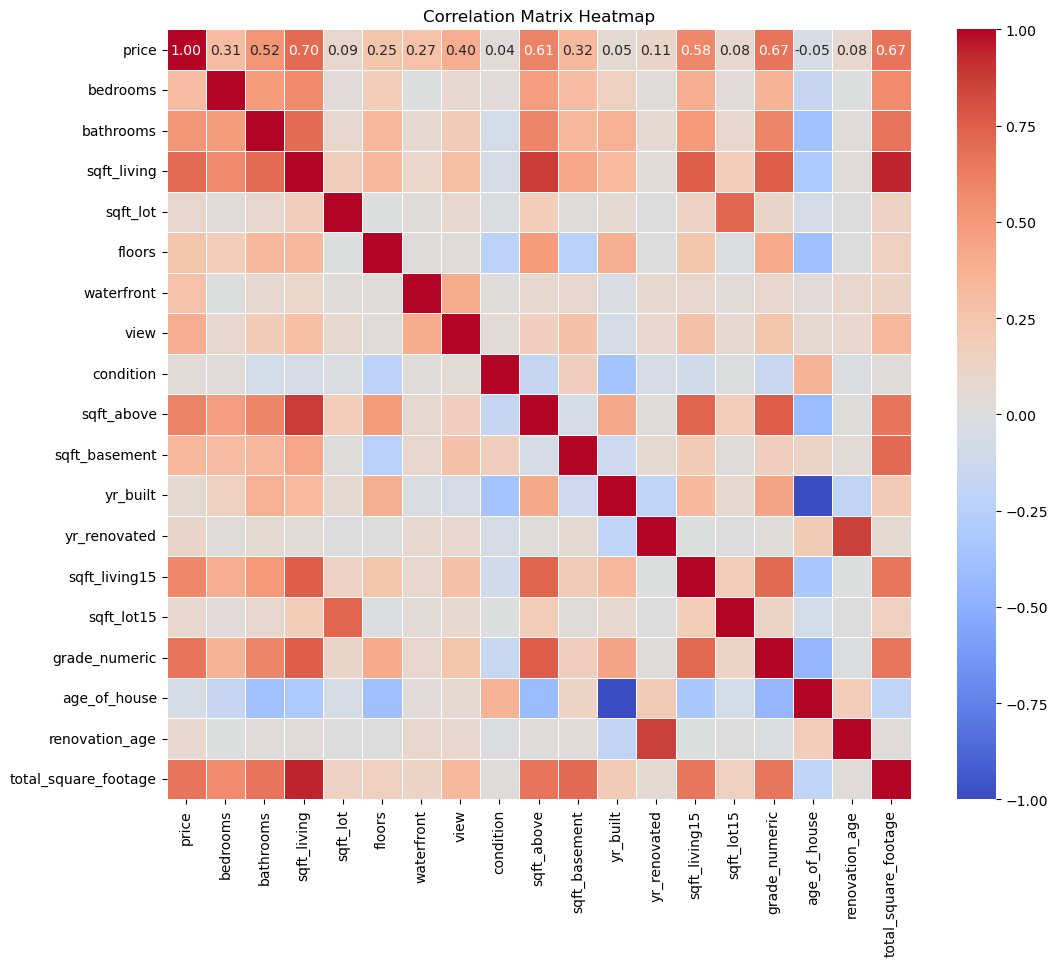

In [30]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Calculating correlation of columns with price

In [31]:
# Extract correlations with price and sort them in descending order
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Select only positive correlations
positive_price_correlations = price_correlations[price_correlations > 0]

# select only negative correlations
negative_price_correlations = price_correlations[price_correlations < 0]

# show them
positive_price_correlations, negative_price_correlations

(price                   1.000000
 sqft_living             0.704290
 total_square_footage    0.669982
 grade_numeric           0.666666
 sqft_above              0.608606
 sqft_living15           0.582200
 bathrooms               0.518967
 view                    0.396750
 sqft_basement           0.323112
 bedrooms                0.309335
 waterfront              0.273221
 floors                  0.245389
 yr_renovated            0.109877
 sqft_lot                0.086570
 sqft_lot15              0.081841
 renovation_age          0.078642
 yr_built                0.051824
 condition               0.035287
 Name: price, dtype: float64,
 age_of_house   -0.051824
 Name: price, dtype: float64)

**Top Correlations with price**:

1. `sqft_living`             0.701917
2. `total_square_footage`    0.668185
3. `grade_numeric`           0.667951
4. `sqft_above`              0.605368
5. `sqft_living15`           0.585241
6. `bathrooms`               0.519628
7. `view`                    0.393497
8. `sqft_basement`           0.321108
9. `bedrooms`                0.308787
10. `waterfront`              0.264306
11. `floors`                  0.244832
12. `yr_renovated`            0.117855
13. `sqft_lot`                0.089876
14. `sqft_lot15`              0.082845
15. `renovation_age`          0.082779
16. `yr_built`                0.053953
17. `condition`               0.036056

**Negative correlation with price**

18. `age_of_house`   -0.053953

## Visualizing the correlations with price

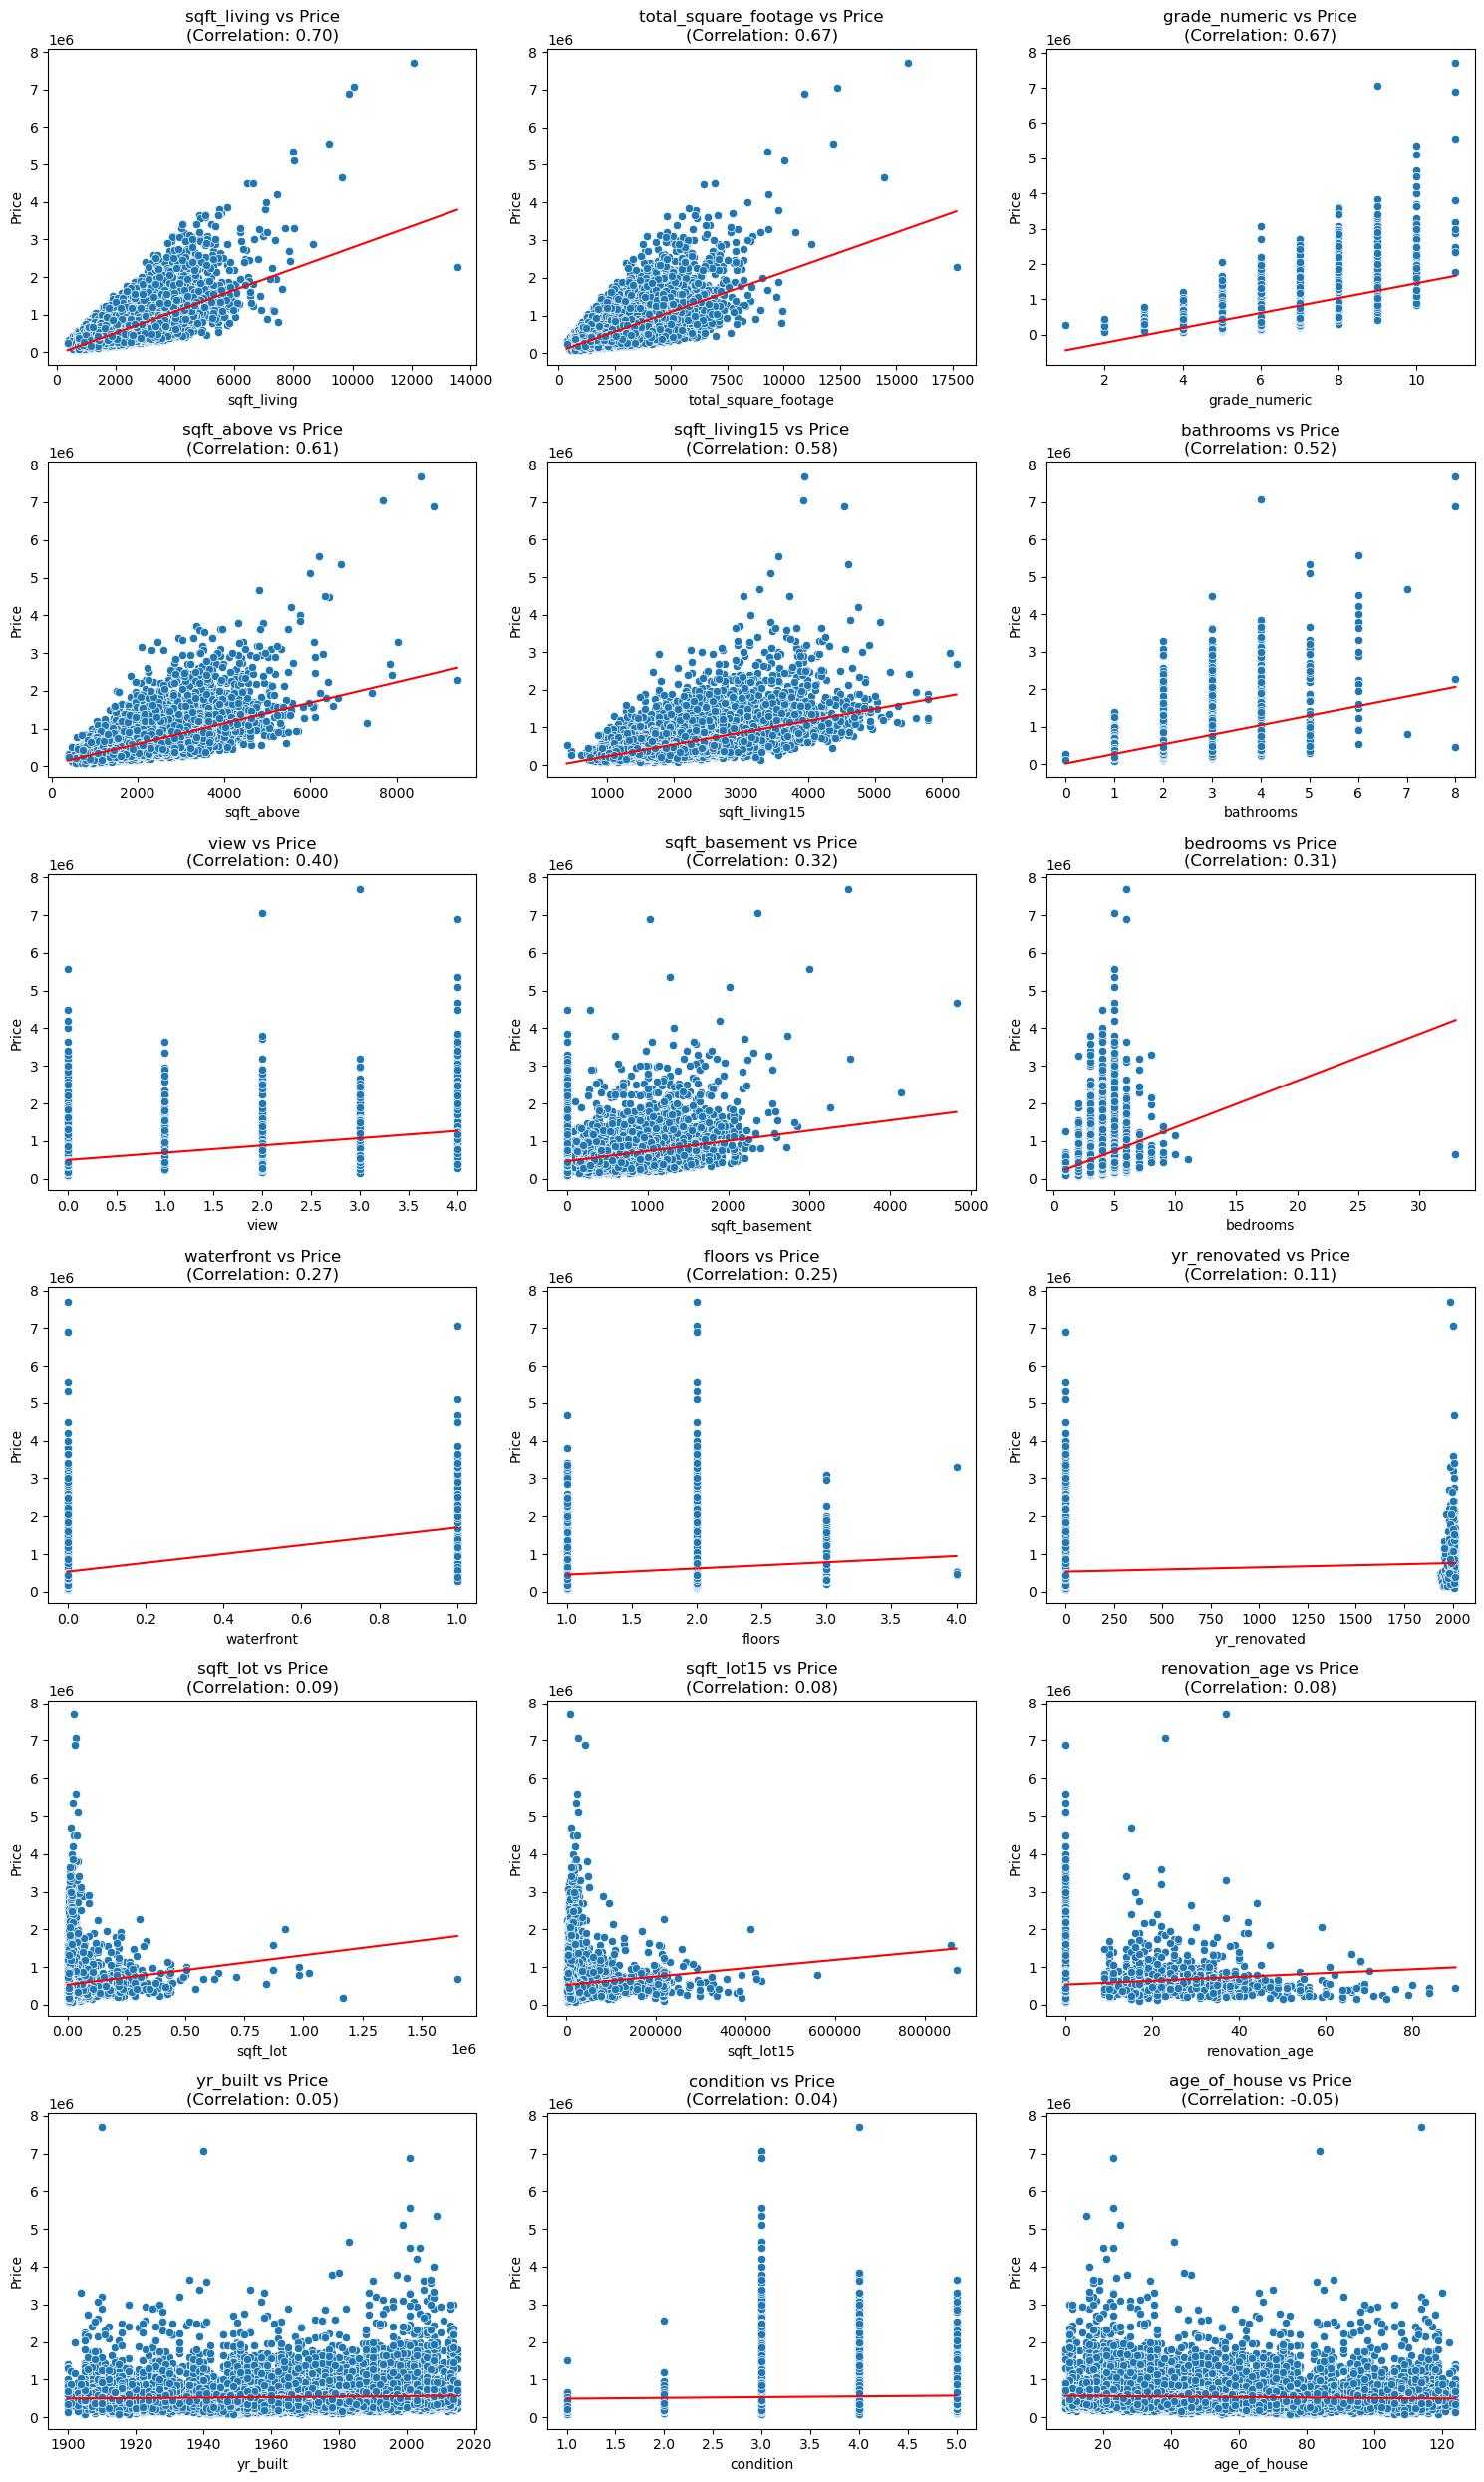

In [32]:
# List of columns to plot against price
columns_to_plot = [
    'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition', 'age_of_house'
]

# Number of columns
num_cols = len(columns_to_plot)

# Set up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column against price
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.scatterplot(data=data, x=col, y='price', ax=ax)
    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(data[col], data['price'])[0, 1]
    # Plot the red line for correlation
    ax.plot(np.unique(data[col]), np.poly1d(np.polyfit(data[col], data['price'], 1))(np.unique(data[col])), color='red')
    ax.set_title(f'{col} vs Price\n(Correlation: {corr_coef:.2f})')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Checking for outliers

In [33]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Columns to check for outliers
columns_to_check = [
    'price', 'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition', 'age_of_house'
]

# Detect outliers for each column
outliers_dict = {col: detect_outliers_iqr(data, col) for col in columns_to_check}

# Summarize the number of outliers for each column
outliers_summary = {col: len(outliers) for col, outliers in outliers_dict.items()}

# Display the summary of outliers
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index', columns=['Number of Outliers'])
print(outliers_summary_df)

                      Number of Outliers
price                               1021
sqft_living                          497
total_square_footage                 465
grade_numeric                       1656
sqft_above                           528
sqft_living15                        440
bathrooms                           6638
view                                1803
sqft_basement                        423
bedrooms                             436
waterfront                           141
floors                                 6
yr_renovated                         630
sqft_lot                            2114
sqft_lot15                          1904
renovation_age                       630
yr_built                               0
condition                             23
age_of_house                           0


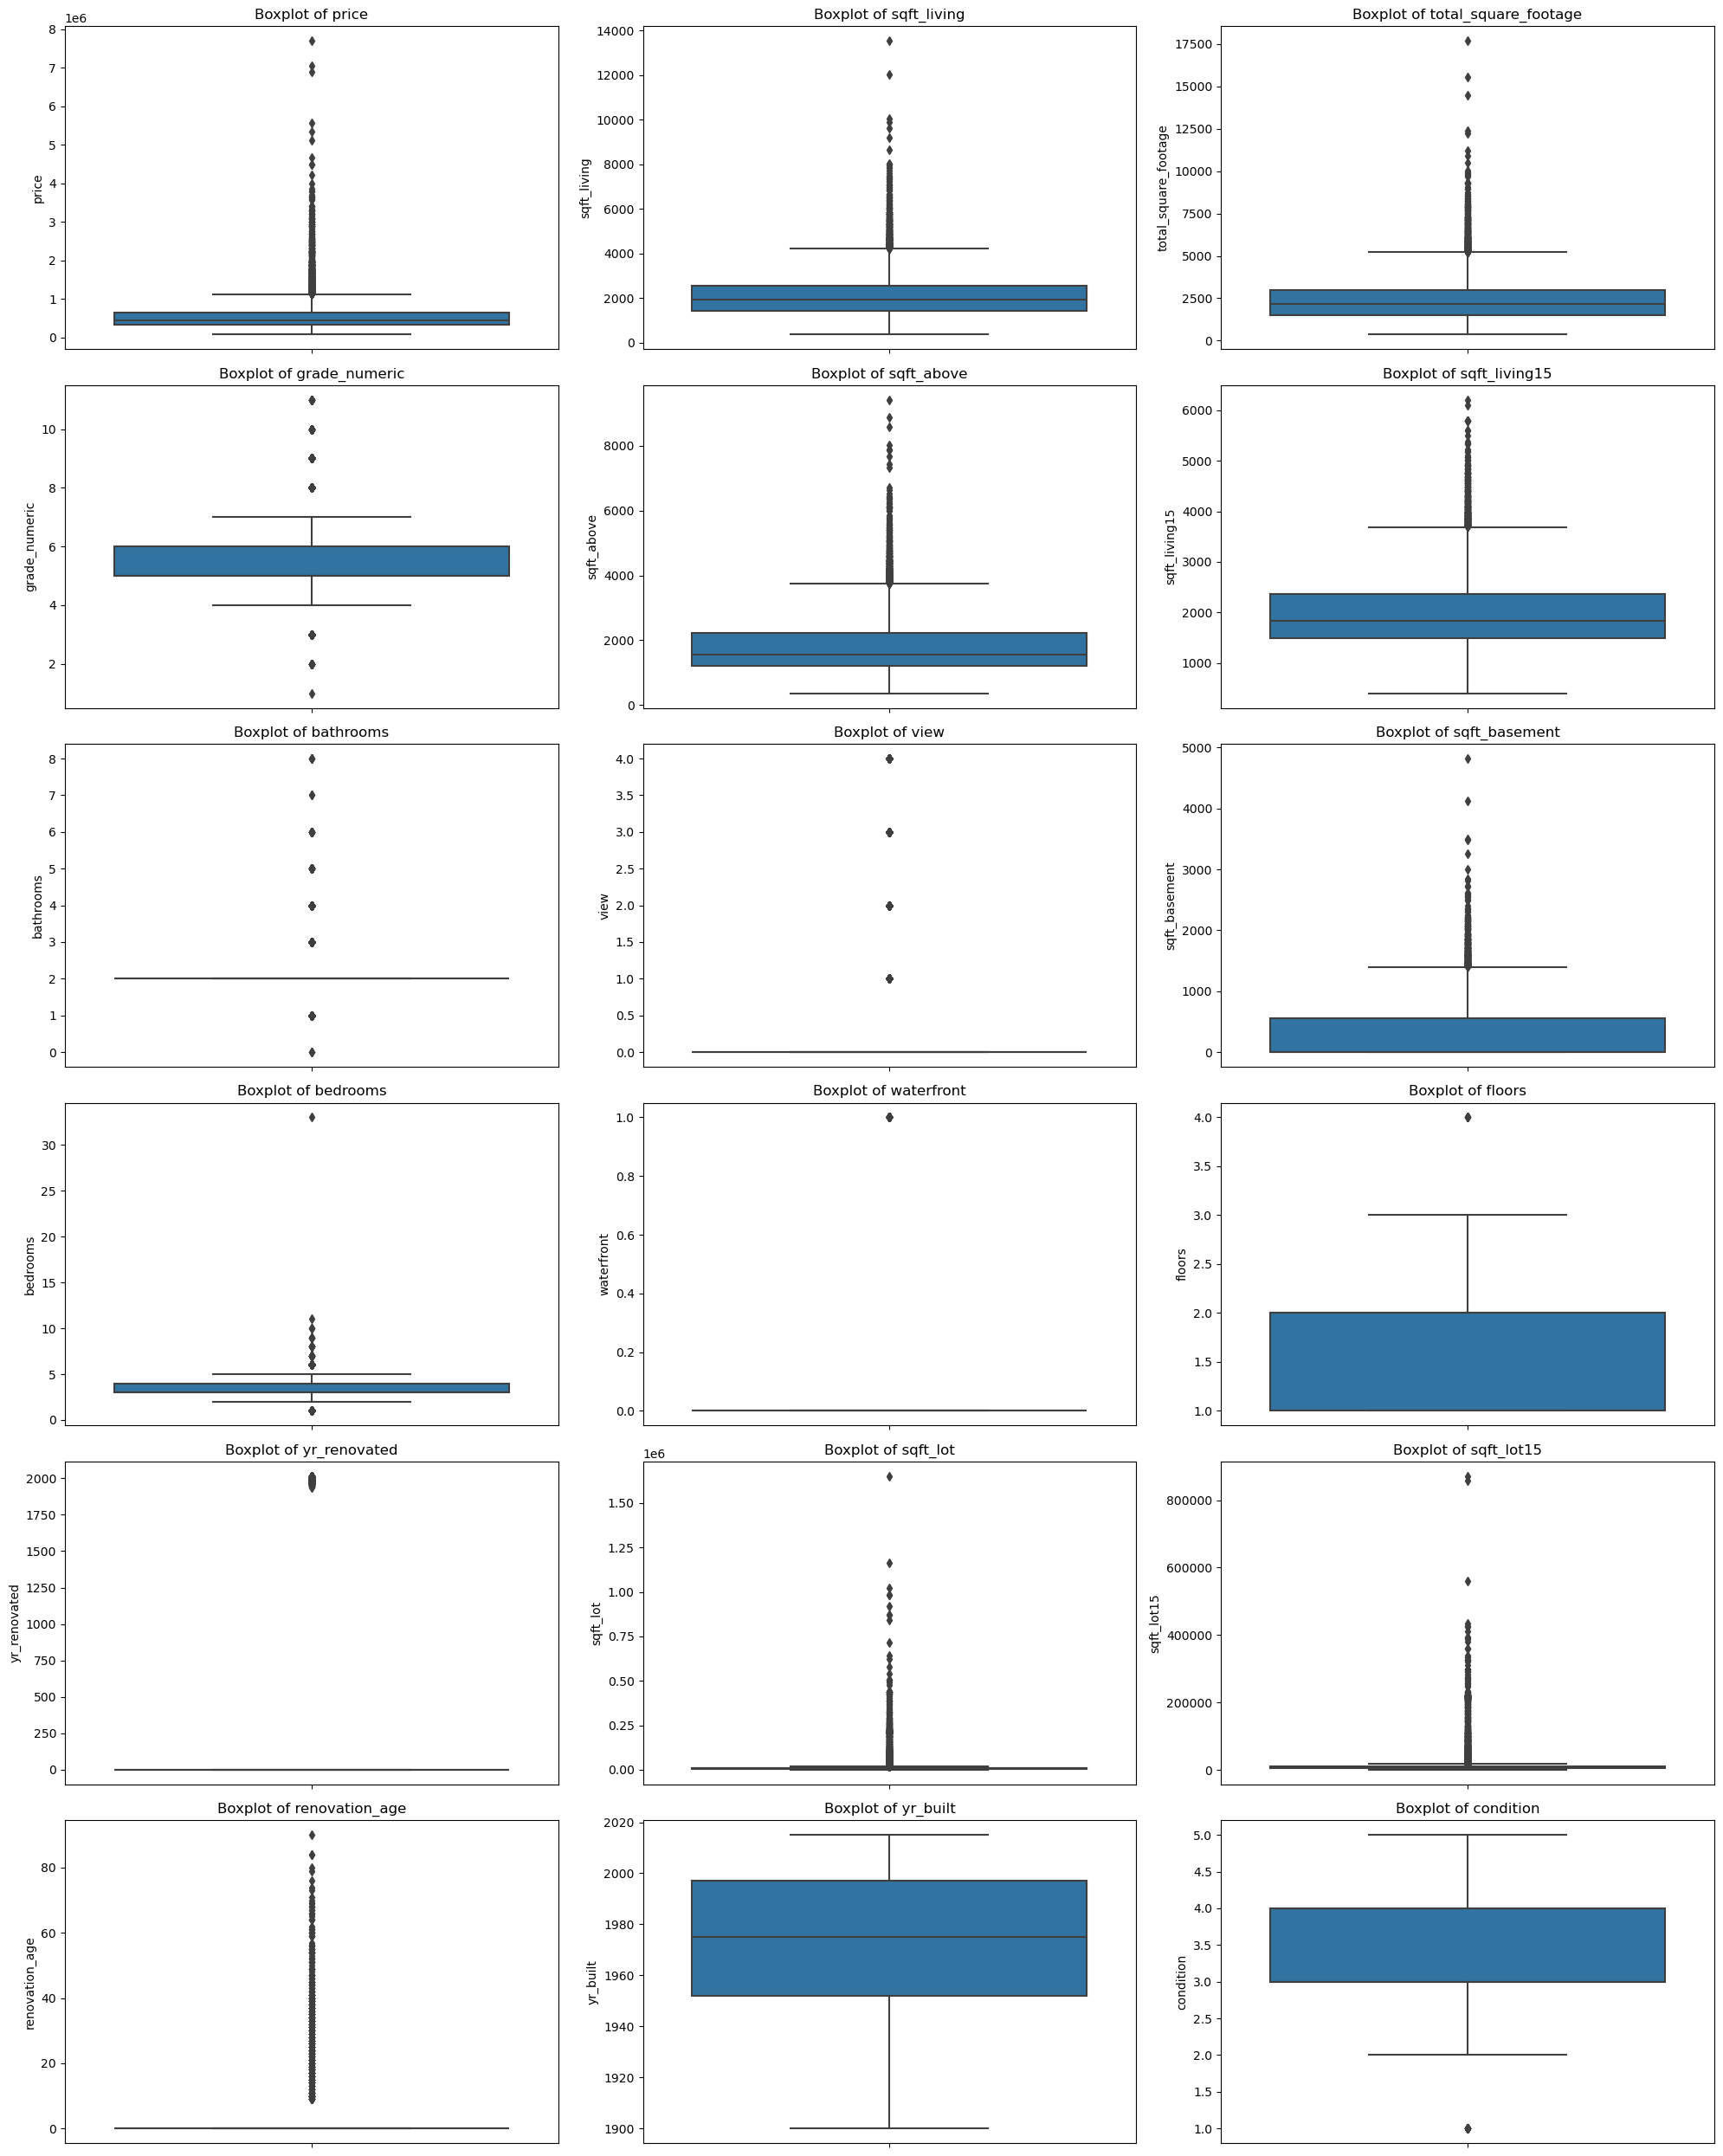

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to check for outliers
columns_to_check = [
    'price', 'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition'
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column to visualize outliers
for i, col in enumerate(columns_to_check):
    ax = axes[i]
    sns.boxplot(data=data, y=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Simple Linear Regression Model